In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split

import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.models import Model
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D,UpSampling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics

Using TensorFlow backend.


# 获取数据

In [2]:
import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
test_x = mnist.test.images # 图片10000
test_y = mnist.test.labels # 标签
train_x=mnist.train.images #55000
train_y=mnist.train.labels

In [5]:
#X = train_data.iloc[:,0:weidu_x_ori]
#Y = train_data.iloc[:,weidu_x_ori:]
#T = test_data.iloc[:,0:weidu_x_ori]
#C = test_data.iloc[:,weidu_x_ori:]

X=train_x
Y=train_y
T=test_x
C=test_y
#scaler = Normalizer().fit(X)
#trainX = scaler.transform(X)

#scaler = Normalizer().fit(T)
#testT = scaler.transform(T)

trainX=train_x
testT=test_x
y_train = train_y
y_test = test_y

In [7]:
weidu_x_ori=28*28

In [8]:
from keras.layers import Input, Dense
import keras
# this is the size of our encoded representations
mid_num=100
input_size=weidu_x_ori
encoding_dim = mid_num  # 
#编码大小24

# this is our input placeholder
input_img = Input(shape=(input_size,))#自编码器输入shape
# "encoded" is the encoded representation of the input

#编码部分
encoded = Dense(encoding_dim, activation='relu')(input_img)

#解码部分，损失部分信息
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_size ,activation='sigmoid')(encoded)
#decoded = Dense(input_size ,activation='sigmoid',kernel_regularizer=keras.regularizers.l1(0.01))(encoded)#sigmoid,relu,tanh

#建立自编码解码器模型
# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

#建立自编码器模型
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

#占位符等待输入——编码输入 64维
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

#自编码器最后一层
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#建立解码器模型
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

#总模型优化目标
autoencoder.compile(optimizer='adadelta', loss='categorical_crossentropy')#mse/binary_crossentropy/categorical_crossentropy



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


D:\Anaconda\envs\IDS-1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
D:\Anaconda\envs\IDS-1\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
D:\Anaconda\envs\IDS-1\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [9]:
#开始学习  50*256
autoencoder.fit(trainX, trainX,
                nb_epoch=50,
                batch_size=3000,
                shuffle=True,
                #device_count={"CPU":12},
                validation_data=(testT, testT))
loss_layer1=autoencoder.evaluate(testT, autoencoder.predict(testT), verbose = 1)#, verbose = 0代表计算过程不显示
print("layer-1损失为："+str(loss_layer1)+'\n')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\Anaconda\envs\IDS-1\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 1s 16us/step - loss: 624.9990 - val_loss: 599.0230
Epoch 2/50
55000/55000 [==============================] - 1s 13us/step - loss: 581.5910 - val_loss: 579.5895
Epoch 3/50
55000/55000 [==============================] - 1s 14us/step - loss: 565.2680 - val_loss: 566.1832
Epoch 4/50
55000/55000 [==============================] - 1s 14us/step - loss: 555.2472 - val_loss: 559.9542
Epoch 5/50
55000/55000 [==============================] - 1s 14us/step - loss: 548.1380 - val_loss: 551.7092
Epoch 6/50
55000/55000 [==============================] - 1s 13us/step - loss: 542.9272 - val_loss: 548.2842
Epoch 7/50
55000/55000 [==============================] - 1s 14us/step - loss: 539.3709 - val_loss: 544.9507
Epoch 8/50
55000/55000 [==============================] - 1s 14us/step - loss: 536.3645 - val_loss: 542.3592
Epoch 9/50
55000/55000 [==============================] - 1s 13us/step - loss

# 数据编码

In [45]:
encoded_train_data = pd.DataFrame(encoder.predict(trainX))
encoded_test_data = pd.DataFrame(encoder.predict(testT))

In [46]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
autoencoder.predict(trainX)

array([[0.0000000e+00, 1.1920929e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.9802322e-08, 0.0000000e+00, ..., 0.0000000e+00,
        5.9604645e-08, 0.0000000e+00],
       [8.9406967e-08, 8.9406967e-08, 1.1920929e-07, ..., 5.9604645e-08,
        8.9406967e-08, 5.9604645e-08],
       ...,
       [5.3644180e-07, 1.1920929e-06, 3.8743019e-07, ..., 1.4901161e-07,
        7.1525574e-07, 1.1920929e-07],
       [5.0961971e-06, 1.1920929e-07, 1.2218952e-06, ..., 6.1690807e-06,
        7.1525574e-07, 1.3709068e-06],
       [2.7120113e-06, 3.3974648e-06, 9.5367432e-07, ..., 6.5565109e-07,
        1.5497208e-06, 2.2053719e-06]], dtype=float32)

In [48]:
import matplotlib.pyplot as plt

In [63]:
position=1600
ori=trainX[position].reshape(28,28)
#mid=encoder.predict(trainX[position].reshape(1,28*28)).reshape(7,7)
en_decoded=autoencoder.predict(trainX[position].reshape(1,28*28)).reshape(28,28)

In [64]:
#autoencoder.predict(trainX[200].reshape(1,28*28))

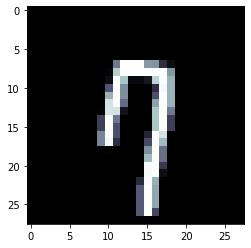

In [65]:
plt.imshow(ori,'bone')

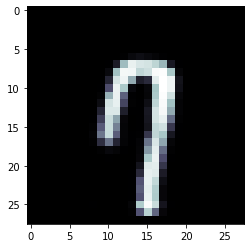

In [66]:
plt.imshow(en_decoded,'bone')

In [32]:
weidu_encoded=len(encoded_train_data.iloc[1])

In [28]:
encoded_train_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,5.398752,6.278047,3.580938,0.000000,0.000000,1.484455,6.600603,1.099844,0.000000,0.000000,...,2.563326,2.124260,5.068234,5.630467,5.340586,0.000000,1.196835,0.000000,5.042018,0.0
1,1.725769,0.000000,3.281141,3.571757,3.438337,2.027230,2.803521,0.249094,2.896202,1.898718,...,6.233778,3.301990,2.414010,0.000000,2.431331,0.267508,3.889462,1.807334,0.801858,0.0
2,5.321959,0.000000,3.204855,1.850370,1.943691,0.577681,0.119134,2.543613,1.563417,0.000000,...,4.741906,0.315360,2.057147,5.647437,2.449878,1.865399,7.699445,1.951591,3.003493,0.0
3,2.950126,7.994647,3.232115,3.141074,3.768372,2.212054,6.470033,0.429892,1.882017,3.695462,...,1.492471,3.070536,3.717540,4.355633,2.968318,5.436883,1.981544,0.000000,1.376758,0.0
4,1.636942,0.000000,1.152899,2.104569,1.427852,2.474058,1.626031,0.458366,0.000000,1.750136,...,2.700227,1.449174,1.987443,0.000000,3.406036,4.275665,0.717273,5.197172,2.265270,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0.000000,0.000000,1.545820,5.057974,4.011364,2.313361,3.901836,0.573626,3.748518,3.378146,...,2.491682,7.055640,4.191986,3.419419,1.887239,0.000000,2.546530,2.499541,1.345368,0.0
54996,0.338265,0.000000,1.886091,3.754637,5.158128,2.076467,2.599750,0.556816,3.748872,2.478272,...,6.908456,3.629078,1.206927,0.725747,3.246931,0.209125,6.530942,0.927235,0.000000,0.0
54997,2.203880,0.000000,3.390905,0.000000,5.760312,2.231620,0.722963,0.847233,1.047008,4.111372,...,2.429658,3.717557,2.442240,0.000000,1.157865,6.601553,0.526058,1.912827,1.567822,0.0
54998,3.899356,6.943176,2.287122,1.937744,1.183595,6.381529,5.689101,2.186828,1.163785,1.405378,...,3.054497,1.990320,1.662855,3.331782,1.160073,9.504177,2.178482,0.105665,3.549601,0.0


In [57]:
encoded_train_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,5.398752,6.278047,3.580938,0.000000,0.000000,1.484455,6.600603,1.099844,0.000000,0.000000,...,2.563326,2.124260,5.068234,5.630467,5.340586,0.000000,1.196835,0.000000,5.042018,0.0
1,1.725769,0.000000,3.281141,3.571757,3.438337,2.027230,2.803521,0.249094,2.896202,1.898718,...,6.233778,3.301990,2.414010,0.000000,2.431331,0.267508,3.889462,1.807334,0.801858,0.0
2,5.321959,0.000000,3.204855,1.850370,1.943691,0.577681,0.119134,2.543613,1.563417,0.000000,...,4.741906,0.315360,2.057147,5.647437,2.449878,1.865399,7.699445,1.951591,3.003493,0.0
3,2.950126,7.994647,3.232115,3.141074,3.768372,2.212054,6.470033,0.429892,1.882017,3.695462,...,1.492471,3.070536,3.717540,4.355633,2.968318,5.436883,1.981544,0.000000,1.376758,0.0
4,1.636942,0.000000,1.152899,2.104569,1.427852,2.474058,1.626031,0.458366,0.000000,1.750136,...,2.700227,1.449174,1.987443,0.000000,3.406036,4.275665,0.717273,5.197172,2.265270,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0.000000,0.000000,1.545820,5.057974,4.011364,2.313361,3.901836,0.573626,3.748518,3.378146,...,2.491682,7.055640,4.191986,3.419419,1.887239,0.000000,2.546530,2.499541,1.345368,0.0
54996,0.338265,0.000000,1.886091,3.754637,5.158128,2.076467,2.599750,0.556816,3.748872,2.478272,...,6.908456,3.629078,1.206927,0.725747,3.246931,0.209125,6.530942,0.927235,0.000000,0.0
54997,2.203880,0.000000,3.390905,0.000000,5.760312,2.231620,0.722963,0.847233,1.047008,4.111372,...,2.429658,3.717557,2.442240,0.000000,1.157865,6.601553,0.526058,1.912827,1.567822,0.0
54998,3.899356,6.943176,2.287122,1.937744,1.183595,6.381529,5.689101,2.186828,1.163785,1.405378,...,3.054497,1.990320,1.662855,3.331782,1.160073,9.504177,2.178482,0.105665,3.549601,0.0


In [62]:
Y[1600]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [80]:
# label列名可以自定义，现在是 label_ + 数字 的格式
Y_label = pd.DataFrame(Y,columns=['label_'+ str(x) for x in range(len(Y[0]))])
C_label = pd.DataFrame(C,columns=['label_'+ str(x) for x in range(len(Y[0]))])

In [82]:
encoded_train_data_withlable=pd.concat([encoded_train_data,Y_label],axis=1)
encoded_test_data_withlable=pd.concat([encoded_test_data,C_label],axis=1)


#encoded_train_data.insert(weidu_encoded,str(weidu_encoded),y_train)#(第几列后面插入，列名，列数据)
#encoded_test_data.insert(weidu_encoded,str(weidu_encoded),y_test)

In [84]:
#列名转为字符串
encoded_train_data_withlable.columns.columns=encoded_train_data_withlable.columns.map(str)
encoded_test_data_withlable.columns.columns=encoded_test_data_withlable.columns.map(str)

## 保存编码结果

In [85]:
encoded_train_data_withlable.to_csv(r'encoded_train_data.csv')
encoded_test_data_withlable.to_csv(r'encoded_test_data.csv')